In [2]:
# from statistics import median
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import nmrglue as ng


# import pulsee.simulation as sim
from plot_dm import plot_complex_density_matrix

import tomography_helper_functions
import tomography_helper_functions as helper
# from tomography.tomography_helper_functions import projection_fortunato, plot_spectra_together
# from tomography.tomography_helper_functions import index_to_element, integrate_simpson, integrate_optimized

# import * is bad practice, but this is the easiest way to do quick theoretical calculations with this many variables.
import operators as op
import global_constants as glob
from coeff_groups_class import CoefficientGroups

from temporal_average import temporal_average

# commented out cuz it causes my computer to not plot anything:
#%matplotlib notebook

plt.rcParams['figure.dpi'] = glob.DPI_DISPLAY

In [3]:
# from statistics import median
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import nmrglue as ng


# import pulsee.simulation as sim
from plot_dm import plot_complex_density_matrix

import tomography_helper_functions
import tomography_helper_functions as helper
# from tomography.tomography_helper_functions import projection_fortunato, plot_spectra_together
# from tomography.tomography_helper_functions import index_to_element, integrate_simpson, integrate_optimized

# import * is bad practice, but this is the easiest way to do quick theoretical calculations with this many variables.
import operators as op
import global_constants as glob
from coeff_groups_class import CoefficientGroups

from temporal_average import temporal_average

# commented out cuz it causes my computer to not plot anything:
#%matplotlib notebook

plt.rcParams['figure.dpi'] = glob.DPI_DISPLAY

In [4]:
# DIFFERENT FOR THIS MEASUREMENT!
SPECTRUM_WIDTH = 2000  # Hz


# assert np.array_equal(freqs, freqs_local)

#B_0 = 14.0921  # Tesla
J = 22.0005  # Hz
L_FREQ = -J/2
R_FREQ = J/2
PHASE_0=-44
#15=0.8758057403799121
#35=0.8678271596689194
#-10=0.893466169581499
# probably won't need...?
#SPECTRUM_OFFSET = 49697.66
#w_1_Bruker = 202474441.0  # Hz
#w_2_Bruker = 202475194.8  # Hz
#TEMP = 310  # Kelvin

# Importing Data
Rearranged folders (from Donny's usual format) so that both P1 and P2 files are in the same folder. This way I don't have to deal with separate "P1" and "P2" folders.

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.


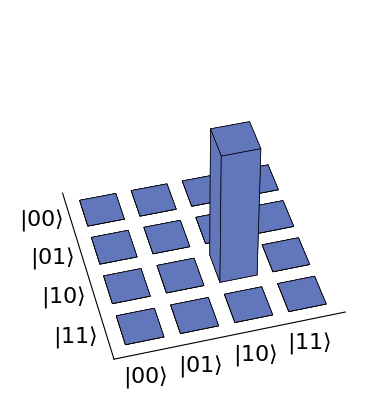

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

In [5]:
state_name = "0100"
rho_theory = op.CLEAN_0010
plot_complex_density_matrix(rho_theory, show_legend=False)
display(rho_theory)

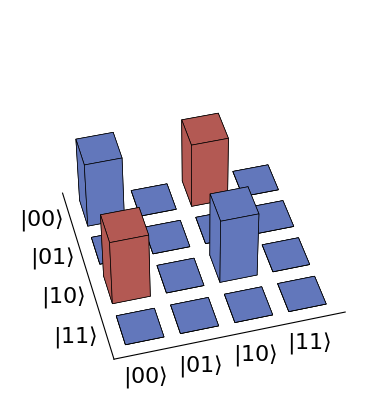

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.5  0.  -0.5  0. ]
 [ 0.   0.   0.   0. ]
 [-0.5  0.   0.5  0. ]
 [ 0.   0.   0.   0. ]]

In [6]:
state_name = "0100"
rho_theory = op.H_1*op.CLEAN_0010*op.H_1.dag()
plot_complex_density_matrix(rho_theory, show_legend=False)
display(rho_theory)

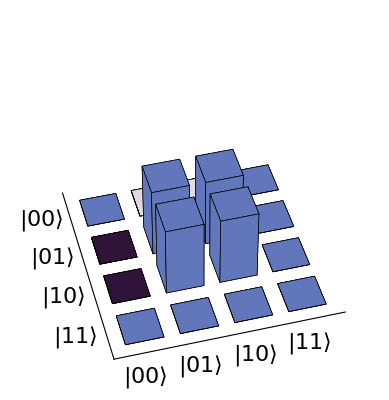

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[3.59204552e-32 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.99999996e-01 4.99999996e-01 0.00000000e+00]
 [0.00000000e+00 4.99999996e-01 4.99999996e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

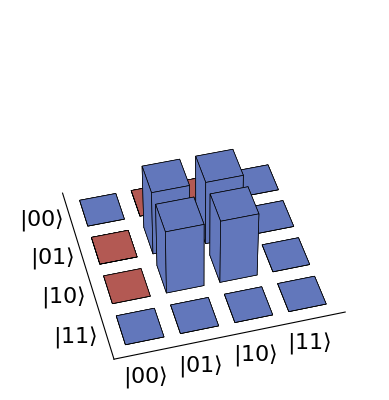

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 3.59204552e-32 -1.34015773e-16 -1.34015773e-16  0.00000000e+00]
 [-1.34015773e-16  4.99999996e-01  4.99999996e-01  0.00000000e+00]
 [-1.34015773e-16  4.99999996e-01  4.99999996e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

In [7]:
rho_theory = op.Rx_I(np.pi)*op.CNOT_Unphased*op.H_1*op.CLEAN_1000*op.H_1.dag()*op.CNOT_Unphased.dag()*op.Rx_I(np.pi).dag()
plot_complex_density_matrix(rho_theory, show_legend=False)
display(rho_theory)

rho_theory = op.Rx_I(np.pi)*op.CNOT_Phased*op.H_1*op.CLEAN_1000*op.H_1.dag()*op.CNOT_Phased.dag()*op.Rx_I(np.pi).dag()
plot_complex_density_matrix(rho_theory, show_legend=False)
display(rho_theory)

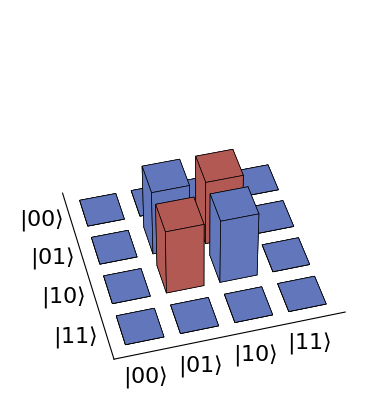

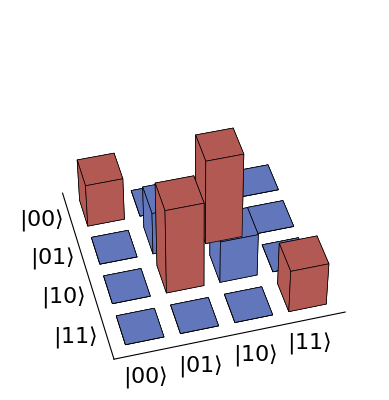

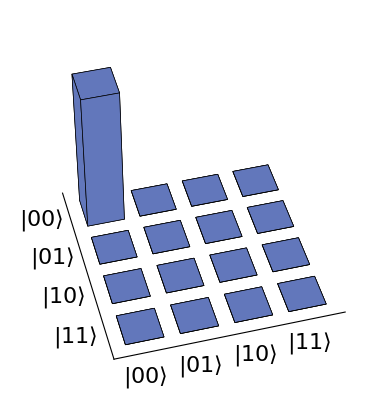

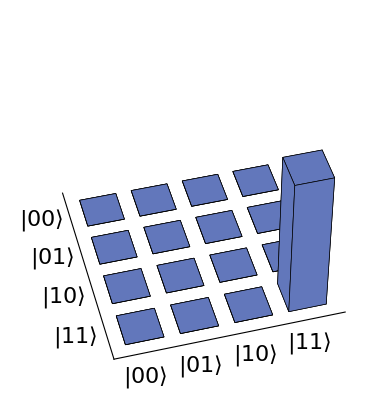

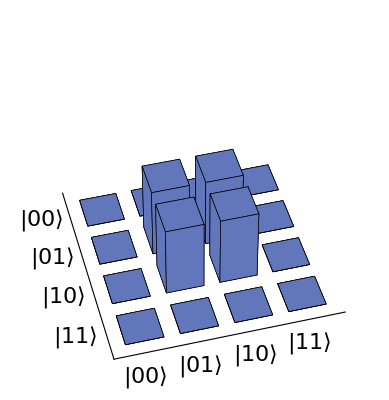

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [30]:
rho_theory = 1/4*op.IDENTITY-(op.IySy+op.IxSx+op.IzSz)
plot_complex_density_matrix(rho_theory, show_legend=False)

rho_theory = -4/3*(op.IySy+op.IxSx+op.IzSz)
plot_complex_density_matrix(rho_theory, show_legend=False)

rho_theory = 1/4*op.IDENTITY+1/2*op.Iz+1/2*op.Sz+op.IzSz
plot_complex_density_matrix(rho_theory, show_legend=False)

rho_theory = 1/4*op.IDENTITY-1/2*op.Iz-1/2*op.Sz+op.IzSz
plot_complex_density_matrix(rho_theory, show_legend=False)

rho_theory = 1/4*op.IDENTITY+op.IxSx+op.IySy-op.IzSz
plot_complex_density_matrix(rho_theory, show_legend=False)

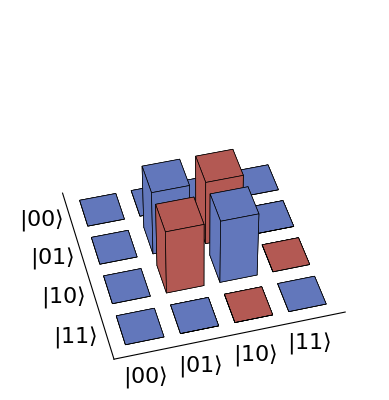

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.99999998e-01 -4.99999998e-01  1.34015774e-16]
 [ 0.00000000e+00 -4.99999998e-01  4.99999998e-01 -1.34015774e-16]
 [ 0.00000000e+00  1.34015774e-16 -1.34015774e-16  3.59204553e-32]]

In [9]:
rho_theory = op.Rx_S(np.pi)*op.CNOT_Phased*op.H_1*op.CLEAN_0010*op.H_1.dag()*op.CNOT_Phased.dag()*op.Rx_S(np.pi).dag()
plot_complex_density_matrix(rho_theory, show_legend=False)
display(rho_theory)

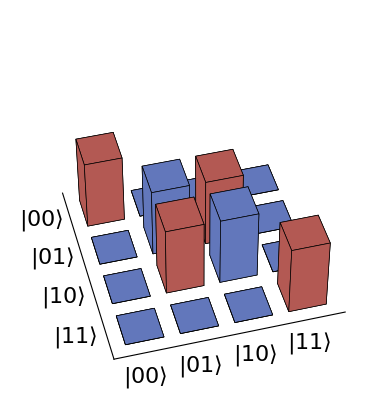

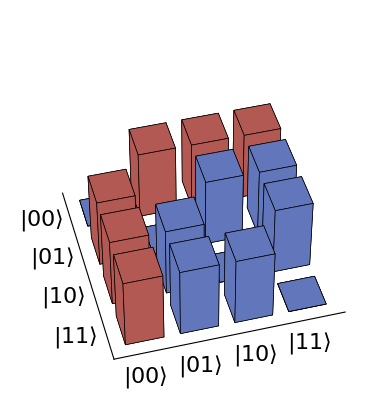

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [33]:
S= 1/4*op.IDENTITY-(op.IySy+op.IxSx+op.IzSz)
Tminus1=1/4*op.IDENTITY-1/2*op.Iz-1/2*op.Sz+op.IzSz
Tplus1=1/4*op.IDENTITY+1/2*op.Iz+1/2*op.Sz+op.IzSz
lls=S-1/2*(Tminus1+Tplus1)
plot_complex_density_matrix(lls, show_legend=False)

lls2=-2*op.IxSz-2*op.IzSx+2*op.IySy
plot_complex_density_matrix(lls2, show_legend=False)

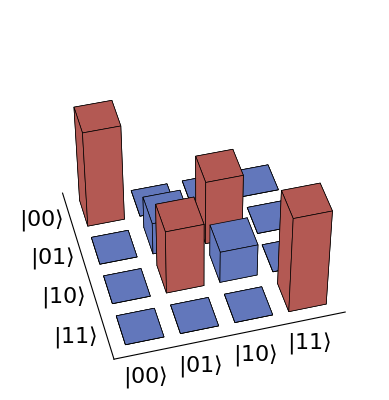

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [35]:
S= 1/4*op.IDENTITY-(op.IySy+op.IxSx+op.IzSz)
Tminus1=1/4*op.IDENTITY-1/2*op.Iz-1/2*op.Sz+op.IzSz
Tplus1=1/4*op.IDENTITY+1/2*op.Iz+1/2*op.Sz+op.IzSz
lls=-1/4*op.IDENTITY+S-1/2*(Tminus1+Tplus1)
plot_complex_density_matrix(lls, show_legend=False)

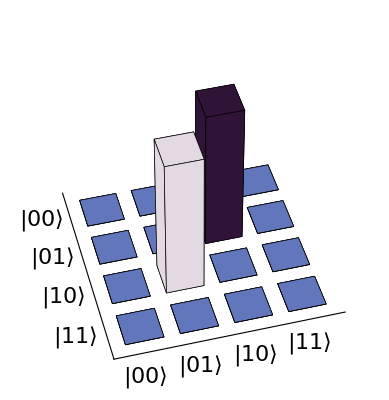

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [44]:
lls=(2*op.IySx-2*op.IxSy)
plot_complex_density_matrix(lls, show_legend=False)

In [49]:
op.IySx-op.IxSy

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.-0.5j 0.+0.j ]
 [0.+0.j  0.+0.5j 0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.+0.j ]]

In [10]:
# Bruker_folders_path = r"C:\Users\lemon\OneDrive - Brown University\CNOT project\tomography\data\Br-uker_folders\2024_12_13"
data_folder = r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\Final_Organized_MIT_DATA\2024_12_17-18\1000_ns1_63"

Flip the frequency axis

# Calculating the frequency axis for the spectrum
All data in below cell is from Donny's email & Bruker plots

According to Bruker's software, the middle of the spectrum should be the experimental larmor frequency (with chemical shift included), and we can set this to 0 Hz. In other words, the frequency axis range is: (-spectrum_width/2, spectrum/2), with 0 in the middle, and left peak should occur at -$J$ and right peak at $J$

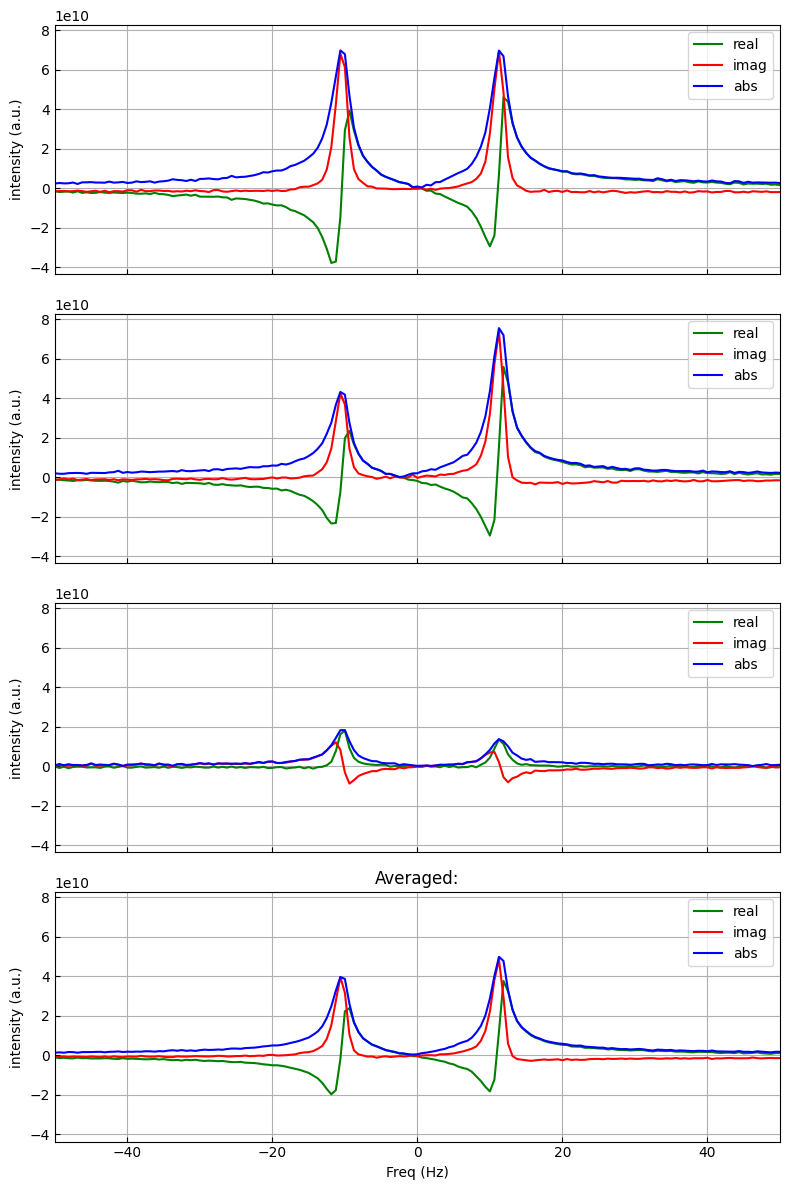

In [11]:
freqs, all_spectra_complex = temporal_average(data_folder, display_avg=True, DISPLAY_I=5)

In [12]:
freqs

array([-999.6875    , -999.06269531, -998.43789062, ...,  997.81308594,
        998.43789062,  999.06269531])

In [13]:

freqs_local = np.linspace(-SPECTRUM_WIDTH / 2, SPECTRUM_WIDTH / 2, all_spectra_complex.shape[1])

In [14]:
all_spectra = np.zeros((all_spectra_complex.shape[0] * 2, all_spectra_complex.shape[1]))

for i in range(all_spectra_complex.shape[0]):
    all_spectra[i * 2, :] = all_spectra_complex[i, :].real
    all_spectra[i * 2 + 1, :] = all_spectra_complex[i, :].imag

all_spectra.shape

(28, 3200)

# Plotting Everything Together

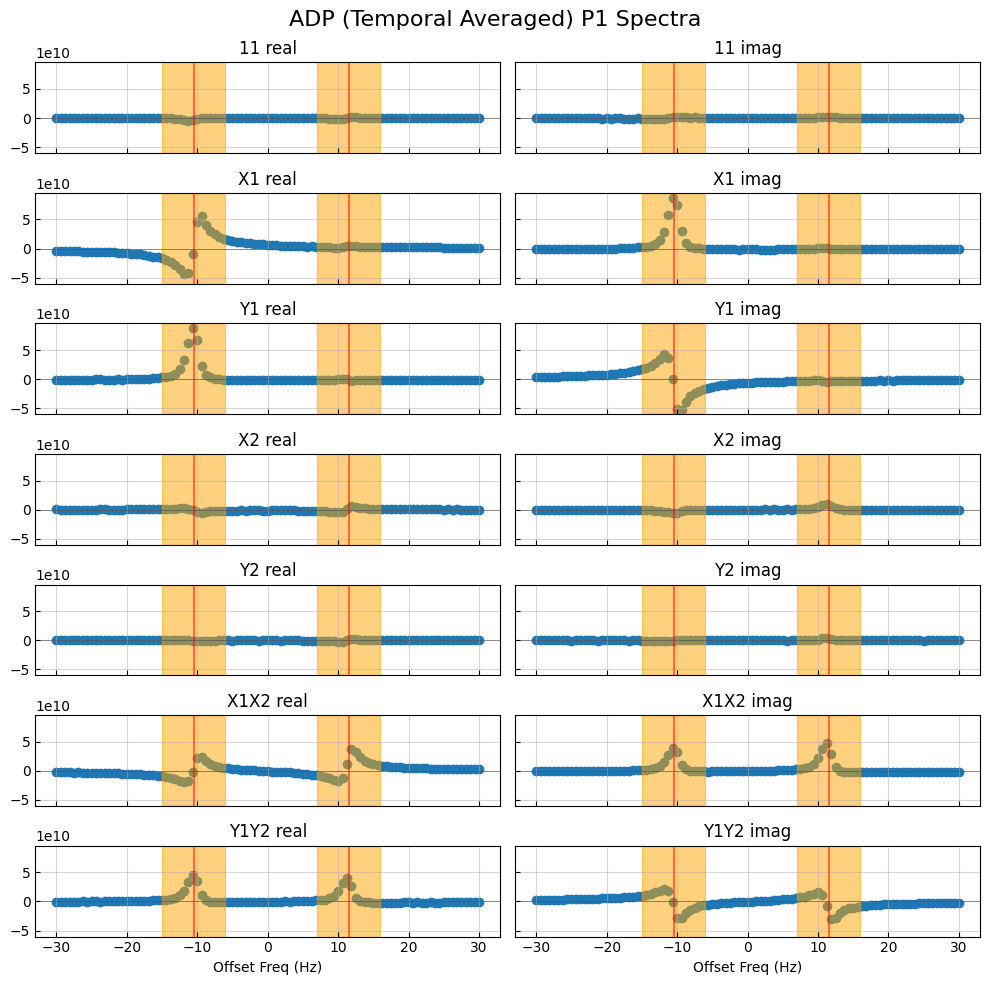

In [15]:
INT_WIDTH = 9  # in Hz. The width to integrate over.
X_LIMS_DISPLAY = [-30, 30]


# Making an offset so the red lines visually line up with the peaks
p1_offset =0.5
p1_freqs = (L_FREQ + p1_offset, R_FREQ + p1_offset)

fig_1, axs_1 = helper.plot_spectra_together(freqs, all_spectra[:all_spectra.shape[0]//2],
                                     glob.SPECTRA_NAMES, X_LIMS_DISPLAY, p1_freqs[0], p1_freqs[1], int_width=INT_WIDTH, share_y=True)
fig_1.suptitle('ADP (Temporal Averaged) P1 Spectra', size=16)
fig_1.tight_layout()
plt.show()

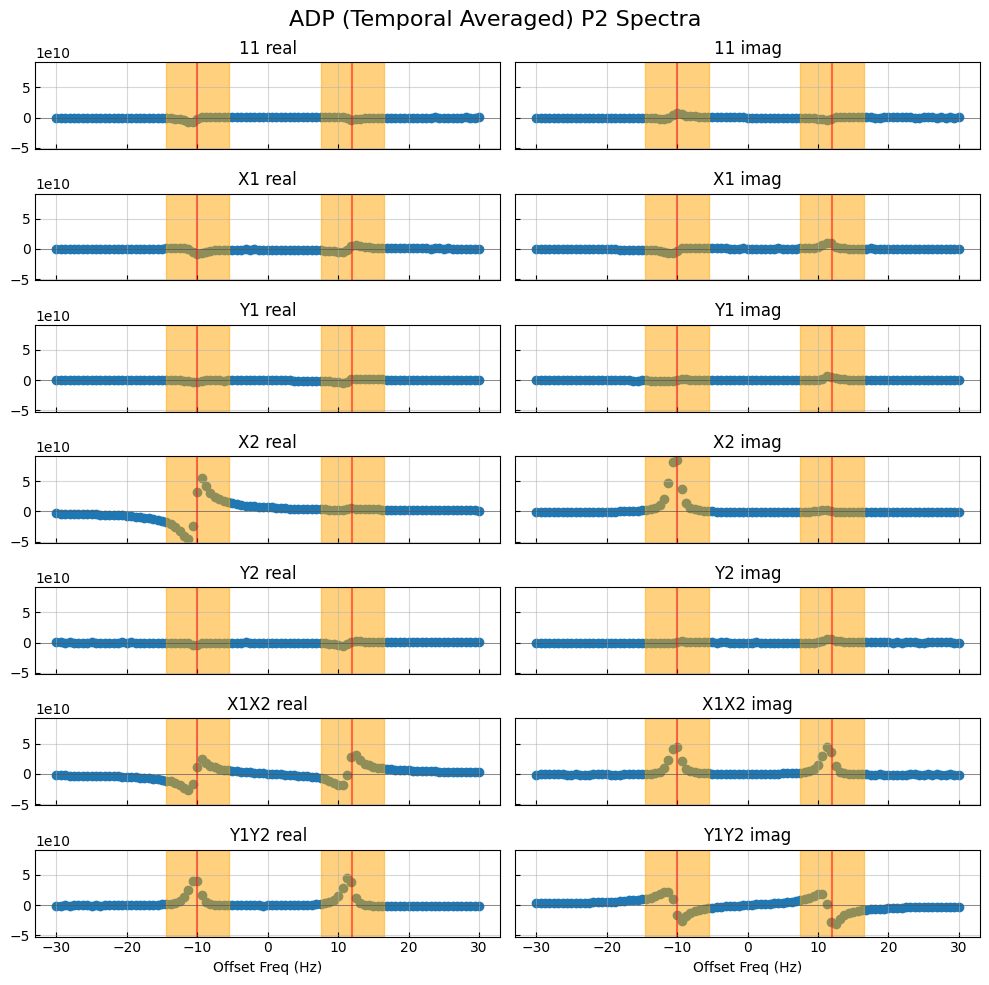

In [16]:
# Making an offset so the red lines visually line up with the peaks
p2_offset = 1
p2_freqs = (L_FREQ + p2_offset, R_FREQ + p2_offset)

fig_2, axs_2 = helper.plot_spectra_together(freqs, all_spectra[all_spectra.shape[0] // 2:], glob.SPECTRA_NAMES, X_LIMS_DISPLAY, p2_freqs[0], p2_freqs[1], int_width=INT_WIDTH, share_y=True)
fig_2.suptitle('ADP (Temporal Averaged) P2 Spectra', size=16)
fig_2.tight_layout()
plt.show()


# Preparing for Tomography Calculations:

We use convention of using the "I" to denote the first spin ($I_1$) and "S" the second spin ($I_2$)

$(I=I_1, S=I_2)$

Quick Check that our pulse sequences covers all 15 basis operators (not necessary)

In [17]:
op.check_basis_complete()

Operator basis is complete (15 elements)


# Three Methods for calculating coefficients

1. Just the height of the spectrum at the expected peak locations
2. Integration of peaks (simpson method & trapezoid method, but both seem to give almost identical answers)
3. (no longer used) Fitting a theoretical Lorentzian model to our data using scipy.curve_fit

## First approach: get height of one data point closest to theoretical peak locations

### Construct a "`coefficient groups`". 
"coefficient groups" is a list of "group"s, with each group being a list of:

`[operator, (c1, spectrum type), (c2, spectrum type), (c3, spectrum type), ...]`

where the first element of the group is a product operator,

and the following elements are tuples of: (coefficients corresponding to that operator, the type of spectrum which the coefficient came from).

In the case of ADP there are two spectrum types: P1 and P2

(each spectrum produces two coefficients)

In [18]:
coeff_groups_height = CoefficientGroups()

for (i, spectrum) in enumerate(all_spectra):
    # Height of the point closest to each peak's frequency location
    L = spectrum[np.absolute(freqs - L_FREQ).argmin()]
    R = spectrum[np.absolute(freqs - R_FREQ).argmin()]
    coeff_groups_height.add_coefficient(op.product_operators[i][0], L + R, helper.index_to_element(i))
    coeff_groups_height.add_coefficient(op.product_operators[i][1], L - R, helper.index_to_element(i))
    # print(f"Spectrum {thermal_col_names[i]} L+R is: {(L+R):.1e}, L-R is {(L-R):.1e}")

print(f'number of groups is: {len(coeff_groups_height.data)} (<- should be 15)')

number of groups is: 15 (<- should be 15)


Average the coefficients for each operator, and reconstruct the density matrix

## Second Approach: integrate the raw data
1. Integrate sample points using (`scipy.integrate.trapezoid`)
2. Integrate sample points using (`scipy.integrate.simpson`)

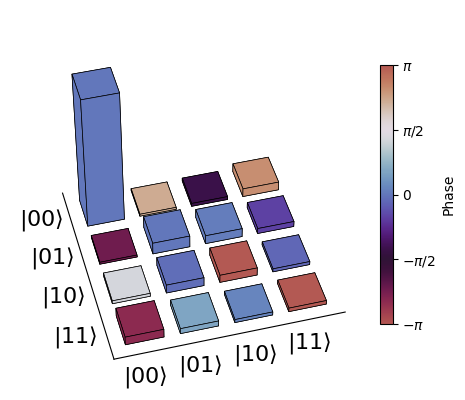

projection of naive integration: (-0.04981282849899895-2.8572657645546757e-19j)


In [19]:
rho_naive = helper.integrate_simpson(freqs, all_spectra, p1_freqs, p2_freqs, INT_WIDTH, positive_diag=False)

plot_complex_density_matrix(rho_naive)
print(f"projection of naive integration: {helper.projection_fortunato(rho_naive, rho_theory)}")

### Integrating with various different parameters to find the integration with the largest projection value:

In [20]:
result_filename = f"result_{state_name}.pickle"
error_filename = f"result_{state_name}_error.pickle"
# result_filename = f"result_{state_name}.pickle"
# error_filename = f"result_{state_name}_error.pickle"

try:
    with open(result_filename, "rb") as result_file:
        best_rho_simpson, best_projection, best_offsets, best_int_width = pickle.load(result_file)
    print("Found previously saved result file!")
        
except FileNotFoundError:
    print("Couldn't find saved result. Integrating and saving the result...")
    best_rho_simpson, best_projection, best_offsets, best_int_width, rho_error = \
        helper.integrate_optimized(freqs, all_spectra, p1_freqs, p2_freqs, rho_theory, return_error=True)
                                   # p1_range=[0], p2_range=[0], width_range=[4])
    with open(result_filename, "wb") as result_file:
        pickle.dump([best_rho_simpson, best_projection, best_offsets, best_int_width], result_file)
    with open(error_filename, "wb") as error_file:
        pickle.dump(rho_error, error_file)


try:
    with open(error_filename, "rb") as error_file:
        rho_error = pickle.load(error_file)
    print("Found previously saved error file")
    
except FileNotFoundError: # in the case where result file exists but error file doesn't.
    print("Couldn't find saved error file. Calculating and saving error")
    rho_error = helper.integrate_simpson(freqs, all_spectra, p1_freqs, p2_freqs, best_int_width,
                                         best_offsets[0], best_offsets[1], return_error=True)
    with open(error_filename, "wb") as error_file:
        pickle.dump(rho_error, error_file)
    

Found previously saved result file!
Found previously saved error file


Best parameters: (1, 5), 2
Best projection: 0.3609342843140702


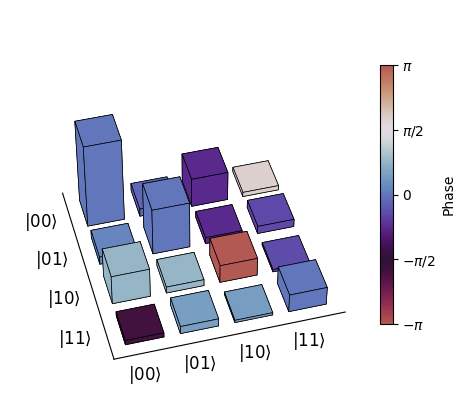

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [21]:
print(f"Best parameters: {best_offsets}, {best_int_width}")
print(f"Best projection: {best_projection}")
plot_complex_density_matrix(best_rho_simpson, label_size=12, label_qubit=True, save_to="")

In [22]:
display(best_rho_simpson)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.64057476+0.j          0.05833775-0.0095169j   0.15597502-0.1610003j
  -0.00945327+0.03343036j]
 [ 0.05833775+0.0095169j   0.35942524+0.j          0.03437051-0.03531333j
   0.05290483-0.02682104j]
 [ 0.15597502+0.1610003j   0.03437051+0.03531333j -0.13901839+0.j
   0.01698445-0.00830834j]
 [-0.00945327-0.03343036j  0.05290483+0.02682104j  0.01698445+0.00830834j
   0.13901839+0.j        ]]

In [23]:
np.min(best_rho_simpson.diag())

-0.13901838868502386

In [24]:
best_rho_simpson - op.IDENTITY * np.min(best_rho_simpson.diag())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.77959315+0.j          0.05833775-0.0095169j   0.15597502-0.1610003j
  -0.00945327+0.03343036j]
 [ 0.05833775+0.0095169j   0.49844363+0.j          0.03437051-0.03531333j
   0.05290483-0.02682104j]
 [ 0.15597502+0.1610003j   0.03437051+0.03531333j  0.        +0.j
   0.01698445-0.00830834j]
 [-0.00945327-0.03343036j  0.05290483+0.02682104j  0.01698445+0.00830834j
   0.27803678+0.j        ]]

In [25]:
import importlib
importlib.reload(tomography_helper_functions)
helper = tomography_helper_functions

print(f"qutip: {qt.fidelity(rho_theory, best_rho_simpson)}")
# print(f"standard: {helper.projection_jozsa(rho_theory, best_rho_simpson)}")
# print(f"standard reversed: {helper.projection_jozsa(best_rho_simpson, rho_theory)}")
# print(qt.fidelity(best_rho_simpson, rho_theory))
print(f"Fortunato: {helper.projection_fortunato(rho_theory, best_rho_simpson)}")

qutip: 0.27537776441971606
Fortunato: (0.09059346229121341+1.1808517969510313e-18j)


In [26]:
(rho_theory.sqrtm() * best_rho_simpson * rho_theory.sqrtm()).sqrtm() ** 2

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  3.79164630e-02+4.13590306e-25j
  -3.79164566e-02-9.11421798e-10j  1.01628066e-17+2.22633457e-25j]
 [ 0.00000000e+00+0.00000000e+00j -3.79164566e-02+9.11421798e-10j
   3.79164501e-02+8.27180613e-25j -1.01628049e-17+2.16563365e-26j]
 [ 0.00000000e+00+0.00000000e+00j  1.01628066e-17-2.22633457e-25j
  -1.01628049e-17-2.16563365e-26j  2.72395234e-33-1.01957882e-56j]]